In [1]:
import os


import pandas as pd
import numpy as np
# import sklearn

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from cal_feature import *
from plot_transient import *
from plot_feature1 import *
from plot_feature2 import *
from myMedFilter import *
from myHeatMap import *
from myScatter import *
from linearRegression import *

In [2]:
# define local directions
file_forder = "./transient_timeDomain/" 
up_dir = "./up_edge/"
down_dir = "./down_edge/"
up_pic_dir = "./up_edge_pic/"
down_pic_dir = "./down_edge_pic/"
PLOT_TRANSIENT = False
PLOT_FEATURE = True
DROP_OUTLIERS = True

# slice data while switching 
### 1. up-edge 
### 2. down-edge

In [3]:
# slice data
SAVE_TRANSIENT = False
PLOT_TRANSIENT = True
for (_ ,_ , process_files) in os.walk(file_forder):
    for file in process_files:
        sample_df = pd.read_csv(file_forder + file )
        sample_name = file[:-4]
        # get index in up and down edge
        n = np.where(sample_df.gateSignalVoltage.values>8)  # return a tuple so use n[0][0] to index
        # slice data
        up_df = sample_df.iloc[n[0][0]-30:n[0][0]+482,:]
        down_df = sample_df.iloc[n[0][-1]-30:n[0][-1]+482,:]
        # save data
        if SAVE_TRANSIENT:
            up_df.to_csv(up_dir+file,index = False)
            down_df.to_csv(down_dir+file,index = False)
        up_df = up_df.drop(["collectorEmitterCurrentSingal"],axis = 1)
        up_df["P"] = up_df["gateEmitterVoltage"]*up_df["collectorEmitterVoltage"]
        down_df = down_df.drop(["collectorEmitterCurrentSingal"],axis = 1)
        down_df["P"] = down_df["gateEmitterVoltage"]*down_df["collectorEmitterVoltage"]
        # plot data
        if PLOT_TRANSIENT:
            plot_transient(down_df,sample_name, down_pic_dir)
            plot_transient(up_df,sample_name,up_pic_dir)

# show info
# print(sample_df.shape)
# print(sample_df.columns)
# sample_df.head()

# featuring

### extract features

In [25]:
# define local directions
up_dir = "./up_edge/"
down_dir = "./down_edge/"

# down edge
all_feature_df = pd.DataFrame()
for (_ ,_ , process_files) in os.walk(down_dir):
    for file in process_files:
        # read file
        sample_df = pd.read_csv(down_dir+file)
        # drop some cols and expand feature P
        sample_df = sample_df.drop(["collectorEmitterCurrentSingal","gateSignalVoltage"],axis = 1)
        sample_df["P"] = sample_df["gateEmitterVoltage"]*sample_df["collectorEmitterVoltage"]
        sample_df.fillna(method = "backfill",inplace = True)
        # calculate features
        for i in range(8):
            subsample_df = sample_df.loc[i::8,:]
            cols = sample_df.columns
            feature_df = pd.DataFrame()
            for col in cols:
                df = cal_feature(subsample_df, col)
                feature_df = pd.concat([feature_df,df],axis = 1)
            feature_df["Vce_pre"] = np.mean(sample_df['collectorEmitterVoltage'].values[:20])
            feature_df["P_pre"] = np.mean(sample_df['P'].values[:20])
            feature_df['round'] = int(file[0:-4])

            all_feature_df = pd.concat([all_feature_df,feature_df],axis = 0)

all_feature_df.sort_values(by = 'round', inplace=True)    
all_feature_df.to_csv('./temp/down_edge_features_subsample.csv',index = False)

# up edge
all_feature_df = pd.DataFrame()
for (_ ,_ , process_files) in os.walk(up_dir):
    for file in process_files:
        # read file
        sample_df = pd.read_csv(up_dir+file)
        # drop some cols and expand feature P
        sample_df = sample_df.drop(["collectorEmitterCurrentSingal","gateSignalVoltage"],axis = 1)
        sample_df["P"] = sample_df["gateEmitterVoltage"]*sample_df["collectorEmitterVoltage"]
        sample_df.fillna(method = "backfill",inplace = True)
        # calculate features
        for i in range(8):
            subsample_df = sample_df.loc[i::8,:]
            cols = sample_df.columns
            feature_df = pd.DataFrame()
            for col in cols:
                df = cal_feature(subsample_df, col)
                feature_df = pd.concat([feature_df,df],axis = 1)
            feature_df["Vce_post"] = np.mean(sample_df['collectorEmitterVoltage'].values[-20:])
            feature_df["P_post"] = np.mean(sample_df['P'].values[-20:])
            feature_df['round'] = int(file[0:-4])

            all_feature_df = pd.concat([all_feature_df,feature_df],axis = 0)

all_feature_df.sort_values(by = 'round', inplace=True)    
all_feature_df.to_csv('./temp/up_edge_features_subsample.csv',index = False)

print(all_feature_df.shape)
all_feature_df.head()

(3344, 81)


,gateEmitterVoltage_min,gateEmitterVoltage_max,gateEmitterVoltage_range,gateEmitterVoltage_mean,gateEmitterVoltage_mode,gateEmitterVoltage_median,gateEmitterVoltage_quantile25,gateEmitterVoltage_quantile75,gateEmitterVoltage_std,gateEmitterVoltage_var,...,P_sf,P_MI,P_CF,P_llr,P_pi,P_sdif,P_cpt1,Vce_post,P_post,round
0,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,1.044061,1.385691,1.260094,1.523784,1.273750,0.311868,1.337781,3.325,31.340578,1
0,-0.156250,9.531250,9.687501,6.743164,6.718750,6.992188,6.210938,8.613281,2.468445,6.093223,...,1.042605,1.344806,1.227379,1.540959,1.252475,0.305263,1.313125,3.325,31.340578,1
0,-0.234375,9.531250,9.765626,6.729736,6.796875,7.031250,6.152344,8.574219,2.449257,5.998859,...,1.040803,1.361320,1.251123,1.552907,1.261521,0.303644,1.313874,3.325,31.340578,1
0,-0.234375,9.531250,9.765626,6.741943,6.562500,7.031250,6.171875,8.613281,2.438665,5.947088,...,1.040147,1.362177,1.252823,1.563501,1.262340,0.299840,1.315191,3.325,31.340578,1
0,-0.234375,9.453125,9.687501,6.737061,6.250000,6.992188,6.210938,8.593750,2.404058,5.779496,...,1.039112,1.369608,1.257162,1.573264,1.264736,0.294527,1.322254,3.325,31.340578,1


### conband the up and down features

In [30]:
# conband the up and down features
up_df = pd.read_csv('./temp/up_edge_features_subsample.csv')
down_df = pd.read_csv('./temp/down_edge_features_subsample.csv')
up_cols = ['up_'+c for c in up_df.columns]
down_cols = ['down_'+c for c in down_df.columns]
up_df.columns = up_cols
down_df.columns = down_cols
up_df['round'] = up_df['up_round']
up_df.drop(['up_round'],axis = 1,inplace = True)
down_df['round'] = down_df['down_round']
down_df.drop(['down_round'],axis = 1,inplace = True)
train_df = pd.merge(up_df,down_df, how="left",on = "round" )

train_df.to_csv("./temp/train_feature_df_subsample.csv",index = False)
print(train_df.shape)
train_df.head()

(26752, 161)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_I,down_P_sf,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre
0,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,3.481133,1.565006,7.265610,2.355374,0.568749,3.521473,1.222860,6.861466,4.478125,43.976075
1,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,3.413819,1.571684,7.029745,2.255375,0.565273,3.444426,1.229431,6.770117,4.478125,43.976075
2,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,3.451345,1.577224,7.072991,2.234421,0.561305,3.475994,1.235153,6.926808,4.478125,43.976075
3,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,3.457056,1.582110,7.035577,2.214080,0.557625,3.475890,1.240125,6.943461,4.478125,43.976075
4,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,3.517311,1.588860,7.285919,2.249739,0.549978,3.538031,1.249215,7.169310,4.478125,43.976075


In [31]:
26752/64

418.0

### add temperature 

In [33]:
# add temperature
train_df = pd.read_csv('./temp/train_feature_df_subsample.csv')
tempareture_df = pd.read_csv("collectorEmitterVoltage_peak_temperature.csv")
train_df = pd.merge(train_df,tempareture_df, how="left",on = "round" )
# change the target num
train_df["num_cycle"] = train_df["round"]
train_df.drop(['round'],axis = 1, inplace = True)

train_df.to_csv("./temp/train_feature_df_subsample.csv",index = False)

print(train_df.shape)
train_df.head()

(26752, 163)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,collectorEmitterVoltage_peak,tempareture,num_cycle
0,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,2.355374,0.568749,3.521473,1.222860,6.861466,4.478125,43.976075,11.937499,47.211104,1
1,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,2.255375,0.565273,3.444426,1.229431,6.770117,4.478125,43.976075,11.937499,47.211104,1
2,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,2.234421,0.561305,3.475994,1.235153,6.926808,4.478125,43.976075,11.937499,47.211104,1
3,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,2.214080,0.557625,3.475890,1.240125,6.943461,4.478125,43.976075,11.937499,47.211104,1
4,-0.234375,9.453125,9.687501,6.690674,6.640625,6.992188,6.191406,8.613281,2.484387,6.172179,...,2.249739,0.549978,3.538031,1.249215,7.169310,4.478125,43.976075,11.937499,47.211104,1


# drop outliers

In [41]:
PLOT_FEATURE = False
DROP_OUTLIERS = True
# drop outl
round_num_del = [1,2,3,4,5,6,7,8,9,10,11,12,13,24,35,46,112,223,334,386,375,364,
                 56,153,208,309,327,347,351,360,365,391
                ]

train_df = pd.read_csv('./temp/train_feature_df_subsample.csv')
if DROP_OUTLIERS:
    for num in round_num_del:
        train_df = train_df.loc[train_df['num_cycle'].values != num,:]
try:
    train_df = train_df.loc[train_df['temperature']>326,:]
except:
    train_df.rename(columns={"tempareture":"temperature"},inplace = True)
    train_df = train_df.loc[train_df['temperature']>326,:]
if PLOT_FEATURE:
    plot_feature1(train_df,"num_cycle",up_pic_dir)
train_df.to_csv("./temp/train_feature_df_outliers_subsample.csv",index = False)

# show info
print(train_df.shape)
train_df.head()

1
2
3
4
5
6
7
8
9
10
11
12
13
24
35
46
112
223
334
386
375
364
56
153
208
309
327
347
351
360
365
391
(24512, 163)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,collectorEmitterVoltage_peak,temperature,num_cycle
1024,-0.15625,9.53125,9.687501,6.640625,9.21875,7.617188,4.824219,8.925781,2.731841,7.462954,...,1.960939,0.792488,2.679733,0.969218,3.723867,1.778125,17.468753,9.937499,329.912613,17
1025,-0.15625,9.53125,9.687501,6.640625,9.21875,7.617188,4.824219,8.925781,2.731841,7.462954,...,1.934222,0.778572,2.665851,0.977526,3.803194,1.778125,17.468753,9.937499,329.912613,17
1026,-0.15625,9.53125,9.687501,6.640625,9.21875,7.617188,4.824219,8.925781,2.731841,7.462954,...,1.936552,0.774169,2.650952,0.975008,3.817809,1.778125,17.468753,9.937499,329.912613,17
1027,-0.15625,9.53125,9.687501,6.640625,9.21875,7.617188,4.824219,8.925781,2.731841,7.462954,...,1.906359,0.790094,2.610835,0.967771,3.658824,1.778125,17.468753,9.937499,329.912613,17
1028,-0.15625,9.53125,9.687501,6.640625,9.21875,7.617188,4.824219,8.925781,2.731841,7.462954,...,1.947271,0.798589,2.643927,0.959321,3.639248,1.778125,17.468753,9.937499,329.912613,17


## filter

In [18]:
PLOT_FEATURE = True
# filter
train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df.drop(round_num_del,axis = 0,inplace = True)
cols = [c for c in train_df.columns if c!="round"]
for c in cols:
    train_df[c] = myMedFilter(train_df[c].values)
if PLOT_FEATURE:
    plot_feature2(train_df,"num_cycle",up_pic_dir)
train_df.to_csv("./temp/train_feature_df_outliers_filter.csv",index = False)

# show info
print(train_df.shape)
train_df.head()

(386, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
13,-0.3125,10.078125,10.390626,7.574158,9.84375,9.296875,6.152344,9.84375,3.221430,10.377609,...,7.602061,2.715831,0.601241,4.870076,1.399963,7.214460,1.748959,17.232425,324.270022,14
14,-0.3125,10.078125,10.390626,7.571411,9.84375,9.296875,6.152344,9.84375,3.218829,10.360859,...,7.558117,2.715831,0.606585,4.870076,1.399722,7.176176,1.748959,17.232425,324.270022,15
15,-0.3125,10.078125,10.390626,7.571411,9.84375,9.296875,6.152344,9.84375,3.218829,10.360859,...,7.129333,2.643536,0.613127,4.795571,1.392261,6.757662,1.748959,17.232425,325.316266,16
16,-0.3125,10.078125,10.390626,7.568054,9.84375,9.296875,6.093750,9.84375,3.216108,10.343349,...,7.129333,2.643536,0.613127,4.795571,1.392261,6.757662,1.759375,17.236738,326.213509,17
17,-0.3125,10.078125,10.390626,7.568054,9.84375,9.296875,6.152344,9.84375,3.218829,10.360859,...,7.092166,2.643536,0.615751,4.795571,1.390806,6.721554,1.761459,17.318769,327.237079,18


# correlation

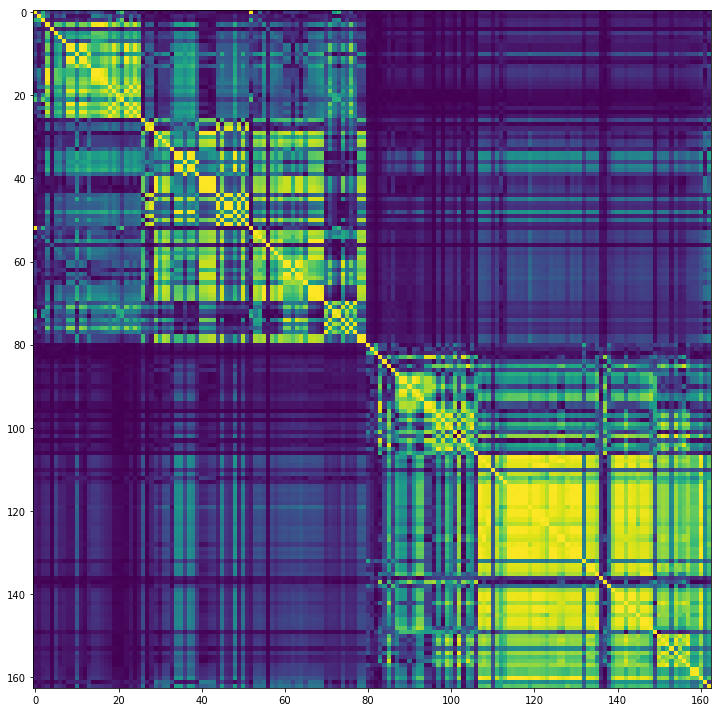

In [42]:
# train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df = pd.read_csv('./temp/train_feature_df_outliers_subsample.csv')
# train_df = pd.read_csv('./temp/train_feature_df_outliers_filter.csv')
corr_df = train_df.corr().abs()
corr_df.to_csv("temp/coelationship_outliners.csv")
# plot
im =np.abs(corr_df.values) 
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.tight_layout()
plt.savefig('temp/correlationship'+'.png')


# feature select

In [16]:
# calculate corr
# train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df = pd.read_csv('./temp/train_feature_df_outliers_subsample.csv')
# train_df = pd.read_csv('./temp/train_feature_df_outliers_filter.csv')
corr_df = train_df.corr().abs()

# collect the duplicate cols
cols = train_df.columns.values
del_cols = []
for i in range(cols.size):
    for j in range(i+1,cols.size,1):
        if(corr_df.iloc[i,j]>0.99):
            if(cols[j] not in del_cols):
                del_cols.append(cols[j])
print("length of delete cols:",len(del_cols))

train_df.drop(del_cols,axis = 1,inplace= True)
corr_df = train_df.corr().abs()
corr_df.sort_values(by = 'num_cycle',axis = 0, ascending=False, inplace = True)
l = corr_df.index.to_series()
x = corr_df.loc[:,'num_cycle']>0.5
cols = l[x].values
print("feature length:",len(cols)-1)
print(cols)
corr_df.head()

length of delete cols: 48
feature length: 32
['num_cycle' 'down_collectorEmitterVoltage_llr'
 'down_collectorEmitterVoltage_mean'
 'down_collectorEmitterVoltage_quantile75'
 'down_collectorEmitterVoltage_sra' 'down_collectorEmitterVoltage_max'
 'down_collectorEmitterVoltage_range' 'down_P_std' 'down_P_msv'
 'down_P_max' 'down_P_range' 'down_P_arv' 'down_P_mean' 'down_P_kurt'
 'down_collectorEmitterVoltage_kurt' 'down_P_skew'
 'down_collectorEmitterVoltage_median' 'down_P_llr' 'down_P_quantile75'
 'down_collectorEmitterVoltage_quantile25' 'down_P_sf' 'down_P_cpt1'
 'down_gateEmitterVoltage_kurt' 'down_P_I' 'down_P_MI'
 'up_collectorEmitterVoltage_std' 'down_gateEmitterVoltage_llr'
 'up_collectorEmitterVoltage_llr' 'up_collectorEmitterVoltage_sf'
 'down_gateEmitterVoltage_mad' 'up_collectorEmitterVoltage_mad'
 'down_P_sdif' 'down_P_pi']


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_skew,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
num_cycle,0.084250,0.020150,0.080688,0.122518,0.012264,0.180927,0.134359,0.098463,0.012340,0.382423,...,0.583178,0.347143,0.609667,0.512717,0.521904,0.598530,0.382112,0.395635,0.170949,1.000000
down_collectorEmitterVoltage_llr,0.074805,0.046407,0.094166,0.101211,0.000149,0.178754,0.082531,0.092722,0.067042,0.270548,...,0.806468,0.485344,0.828028,0.718689,0.739676,0.823595,0.668488,0.674018,0.555343,0.794709
down_collectorEmitterVoltage_mean,0.080278,0.046366,0.098341,0.112464,0.003954,0.184413,0.097923,0.094646,0.056378,0.305841,...,0.805809,0.448425,0.844378,0.706963,0.777203,0.819264,0.742278,0.743645,0.477264,0.758864
down_collectorEmitterVoltage_quantile75,0.065556,0.032464,0.076042,0.074338,0.003736,0.146128,0.052419,0.073038,0.067419,0.208455,...,0.692638,0.403459,0.725241,0.613872,0.633467,0.711437,0.604299,0.608304,0.479639,0.747839
down_collectorEmitterVoltage_sra,0.078622,0.038806,0.091096,0.104895,0.001917,0.171225,0.094495,0.088320,0.052313,0.294663,...,0.756662,0.408854,0.807148,0.666310,0.755669,0.767540,0.717021,0.717176,0.429213,0.731030


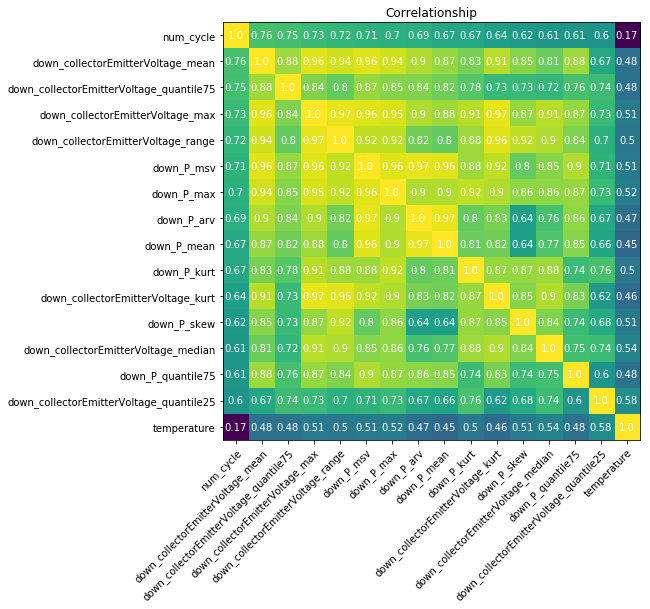

In [48]:
from myHeatMap import *
if 'temperature' not in cols:
    cols = np.append(cols,'temperature')

# train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df = pd.read_csv('./temp/train_feature_df_outliers_subsample.csv')
# train_df = pd.read_csv('./temp/train_df_scale.csv')
feature_df = train_df.loc[:,cols]
feature_df.to_csv('./temp/useful_feature_df.csv',index = False)
corr_df = feature_df.corr().abs()
corr_df.to_csv("temp/correlationship_usefue_features.csv")
# plot
im =np.abs(corr_df.values) 
im = im.round(2)
myHeatMap(im,cols,cols)

### scale to [0, 1]

In [7]:
# std
# feature_df = pd.read_csv('./temp/useful_feature_df.csv')
target = ["temperature","num_cycle"]
cols_to_use = [c for c in cols if c not in target]
fliter = MinMaxScaler()
for col in cols_to_use:
    feature_df[col] = fliter.fit_transform(feature_df[col].values.reshape(-1, 1))
    
X = feature_df[cols_to_use].values
feature_df.to_csv("temp/train_df_scale.csv",index = False)
feature_df.head()

NameError: name 'MinMaxScaler' is not defined

### dimension reduce

In [4]:
feature_df = pd.read_csv("temp/train_df_scale.csv")
target = ["temperature","num_cycle"]
cols_to_use = [c for c in feature_df.columns.values if c not in target]
X = feature_df[cols_to_use].values

feature_df.head()

,num_cycle,up_collectorEmitterVoltage_llr,up_collectorEmitterVoltage_std,down_P_mean,down_collectorEmitterVoltage_max,down_gateEmitterVoltage_kurt,down_P_sf,down_P_max,down_P_quantile75,down_P_MI,...,down_gateEmitterVoltage_msv,down_gateEmitterVoltage_quantile75,down_collectorEmitterVoltage_quantile75,down_gateEmitterVoltage_sdif,up_gateEmitterVoltage_skew,up_collectorEmitterVoltage_sf,down_collectorEmitterVoltage_median,down_gateEmitterVoltage_std,down_gateEmitterVoltage_sra,temperature
0,17,0.716696,0.519404,0.634215,0.629032,0.210838,0.522472,0.492622,0.641344,0.436961,...,0.801938,0.6,0.37500,0.455757,1.000000,0.745154,0.833333,0.605962,0.439825,329.912613
1,18,0.221619,0.826368,0.526987,0.709677,0.209354,0.476351,0.533485,0.516811,0.416931,...,0.751188,0.6,0.15625,0.436655,0.765671,0.768393,0.666667,0.846119,0.643546,327.237079
2,19,0.305743,0.686036,0.832453,0.951613,0.148879,0.808098,0.790011,0.820672,0.692599,...,0.835834,0.8,0.12500,0.828188,0.602096,0.543115,1.000000,0.885588,0.297975,326.213509
3,20,0.454839,0.714181,0.573270,0.645161,0.237734,0.492321,0.565834,0.642590,0.441721,...,0.634682,0.6,0.50000,0.527420,0.808537,0.830490,0.666667,0.764624,0.574437,329.365197
4,21,0.253959,0.799547,0.643024,0.741935,0.114086,0.553468,0.652667,0.716064,0.505227,...,0.813247,0.8,0.37500,0.563711,0.865340,0.747255,0.833333,0.947072,0.579455,328.195866


In [5]:
from myScatter import *
# PCA
# dimension reduce
pca = decomposition.PCA(n_components = 2)
X_reduce = pca.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['num_cycle'] = feature_df['num_cycle']
map_df['temperature'] = feature_df['temperature']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/PCA'+'_map.csv',index = False)

    
myScatter(map_df,"PCA")    

NameError: name 'decomposition' is not defined

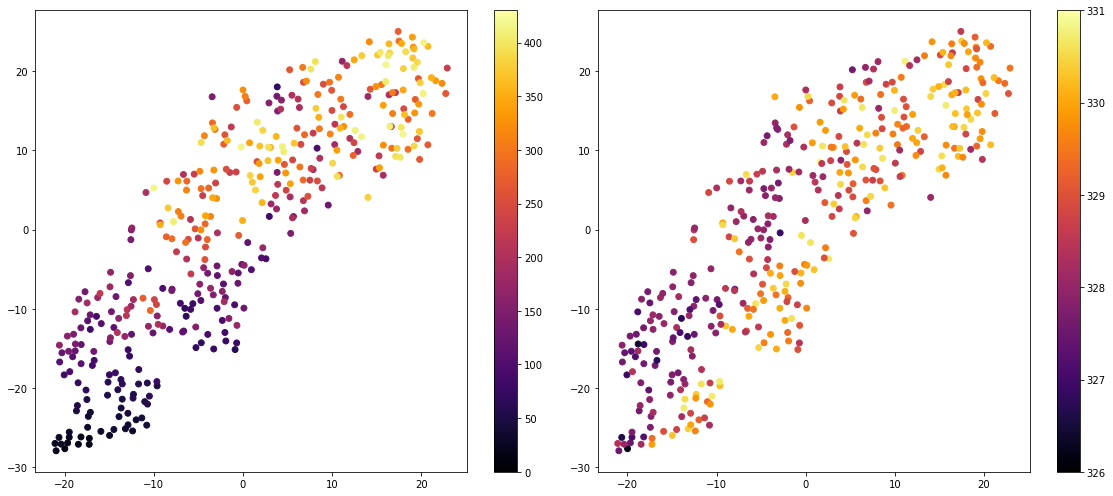

In [69]:
# TSNE
# dimension reduce
tsne = manifold.TSNE(n_components=2, init='random', random_state=1)
X_reduce = tsne.fit_transform(X)
# save map
map_df = pd.DataFrame()
map_df['num_cycle'] = feature_df['num_cycle']
map_df['temperature'] = feature_df['temperature']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/'+'map_'+"TSNE"+'.csv',index = False)
# plot
myScatter(map_df,"TSNE")  

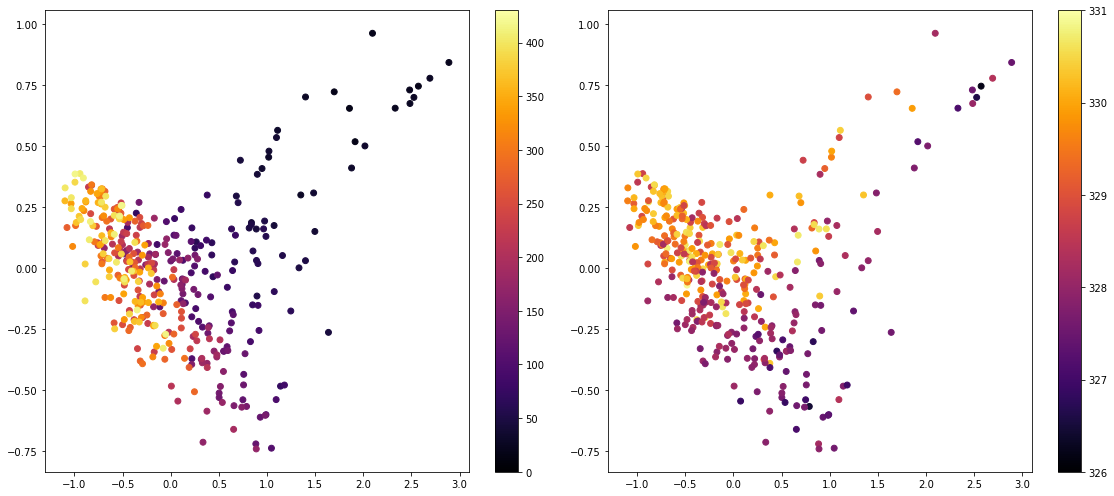

In [71]:
# Isomap
# dimension reduce
Isomap = manifold.Isomap(n_neighbors = 8 , n_components = 2)
X_reduce = Isomap.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['num_cycle'] = feature_df['num_cycle']
map_df['temperature'] = feature_df['temperature']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/'+'map_'+"Isomap"+'.csv',index = False)
# plot
myScatter(map_df,"Isomap")  

In [ ]:
# MDS
# dimension reduce
mds = manifold.MDS(n_components=2)
X_reduce = mds.fit_transform(X)

# SpectralEmbedding
# dimension reduce
se = manifold.SpectralEmbedding(n_components= 2, n_neighbors= 10)
X_reduce = se.fit_transform(X)

### try some Nueral Network

In [49]:
train_df = pd.read_csv( "./temp/train_df_scale_subsample.csv")

print(train_df.shape)
train_df.head()

(24512, 163)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,collectorEmitterVoltage_peak,temperature,num_cycle
0,0.75,0.25,0.166667,0.181452,0.96063,0.4,0.115385,0.352941,0.546043,0.538233,...,0.598479,0.459871,0.549960,0.488854,0.471886,0.729167,0.741919,0.629032,329.912613,17
1,0.75,0.25,0.166667,0.181452,0.96063,0.4,0.115385,0.352941,0.546043,0.538233,...,0.462854,0.358735,0.518137,0.564432,0.531290,0.729167,0.741919,0.629032,329.912613,17
2,0.75,0.25,0.166667,0.181452,0.96063,0.4,0.115385,0.352941,0.546043,0.538233,...,0.474680,0.326737,0.483982,0.541530,0.542235,0.729167,0.741919,0.629032,329.912613,17
3,0.75,0.25,0.166667,0.181452,0.96063,0.4,0.115385,0.352941,0.546043,0.538233,...,0.321409,0.442479,0.392018,0.475696,0.423179,0.729167,0.741919,0.629032,329.912613,17
4,0.75,0.25,0.166667,0.181452,0.96063,0.4,0.115385,0.352941,0.546043,0.538233,...,0.529094,0.504212,0.467878,0.398826,0.408520,0.729167,0.741919,0.629032,329.912613,17


# prepare data

In [3]:
cols =['num_cycle','up_collectorEmitterVoltage_llr',
 'up_collectorEmitterVoltage_std', 'down_P_mean',
 'down_collectorEmitterVoltage_max' ,'down_gateEmitterVoltage_kurt',
 'down_P_sf' ,'down_P_max' ,'down_P_quantile75', 'down_P_MI',
 'down_gateEmitterVoltage_mad', 'down_P_I', 'down_gateEmitterVoltage_msv',
 'down_gateEmitterVoltage_quantile75',
 'down_collectorEmitterVoltage_quantile75', 'down_gateEmitterVoltage_sdif',
 'up_gateEmitterVoltage_skew', 'up_collectorEmitterVoltage_sf',
 'down_collectorEmitterVoltage_median', 'down_gateEmitterVoltage_std',
 'down_gateEmitterVoltage_sra']

['num_cycle' 'down_collectorEmitterVoltage_llr'
 'down_collectorEmitterVoltage_mean'
 'down_collectorEmitterVoltage_quantile75'
 'down_collectorEmitterVoltage_sra' 'down_collectorEmitterVoltage_max'
 'down_collectorEmitterVoltage_range' 'down_P_std' 'down_P_msv'
 'down_P_max' 'down_P_range' 'down_P_arv' 'down_P_mean' 'down_P_kurt'
 'down_collectorEmitterVoltage_kurt' 'down_P_skew'
 'down_collectorEmitterVoltage_median' 'down_P_llr' 'down_P_quantile75'
 'down_collectorEmitterVoltage_quantile25' 'down_P_sf' 'down_P_cpt1'
 'down_gateEmitterVoltage_kurt' 'down_P_I' 'down_P_MI'
 'up_collectorEmitterVoltage_std' 'down_gateEmitterVoltage_llr'
 'up_collectorEmitterVoltage_llr' 'up_collectorEmitterVoltage_sf'
 'down_gateEmitterVoltage_mad' 'up_collectorEmitterVoltage_mad'
 'down_P_sdif' 'down_P_pi']

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

train_df = pd.read_csv( "./temp/train_df_scale_subsample.csv")
train_df["temperature"] = (train_df["temperature"] - 326)/5.0
target = ["num_cycle"]
if 'temperature' not in cols:
    cols = np.append(cols,'temperature')
cols = [c for c in cols if c not in target]
print(cols)
# get data
num = 370
x_train = train_df.loc[train_df['num_cycle'].values < num,cols].values
y_train = train_df.loc[train_df['num_cycle'].values < num,"num_cycle"].values/100.0
x_test = train_df.loc[train_df['num_cycle'].values > num,cols].values
y_test = train_df.loc[train_df['num_cycle'].values > num,"num_cycle"].values/100.0
# astype
x_train = torch.tensor(x_train,dtype = torch.float32 )
y_train = torch.tensor(y_train,dtype = torch.float32)
y_train = y_train.unsqueeze_(1)
x_test = torch.tensor(x_test,dtype = torch.float32 )
y_test = torch.tensor(y_test,dtype = torch.float32)
y_test = y_test.unsqueeze_(1)
# split

print("train data size",x_train.shape)
print("train label size",y_train.shape)
print("test data size",x_test.shape)
print("test label size",y_test.shape)

['down_collectorEmitterVoltage_llr', 'down_collectorEmitterVoltage_mean', 'down_collectorEmitterVoltage_quantile75', 'down_collectorEmitterVoltage_sra', 'down_collectorEmitterVoltage_max', 'down_collectorEmitterVoltage_range', 'down_P_std', 'down_P_msv', 'down_P_max', 'down_P_range', 'down_P_arv', 'down_P_mean', 'down_P_kurt', 'down_collectorEmitterVoltage_kurt', 'down_P_skew', 'down_collectorEmitterVoltage_median', 'down_P_llr', 'down_P_quantile75', 'down_collectorEmitterVoltage_quantile25', 'down_P_sf', 'down_P_cpt1', 'down_gateEmitterVoltage_kurt', 'down_P_I', 'down_P_MI', 'up_collectorEmitterVoltage_std', 'down_gateEmitterVoltage_llr', 'up_collectorEmitterVoltage_llr', 'up_collectorEmitterVoltage_sf', 'down_gateEmitterVoltage_mad', 'up_collectorEmitterVoltage_mad', 'down_P_sdif', 'down_P_pi', 'temperature']
train data size torch.Size([21568, 33])
train label size torch.Size([21568, 1])
test data size torch.Size([2880, 33])
test label size torch.Size([2880, 1])


In [19]:
from torch.utils.data import DataLoader
from myDataset import *
train_set = myDataset(x_train,y_train)
test_set = myDataset(x_test,y_test)

train_loader = DataLoader(train_set, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_set, batch_size=720, shuffle=True)

use gpu: True
step:[100], train loss: 0.134461, test loss: 0.582308
step:[200], train loss: 0.118903, test loss: 0.384426
step:[300], train loss: 0.095896, test loss: 0.331558
step:[400], train loss: 0.100259, test loss: 0.320251
step:[500], train loss: 0.113549, test loss: 0.303293
step:[600], train loss: 0.107540, test loss: 0.300675
step:[700], train loss: 0.089147, test loss: 0.298103
step:[800], train loss: 0.074414, test loss: 0.313991
step:[900], train loss: 0.094805, test loss: 0.284816
step:[1000], train loss: 0.087171, test loss: 0.310447


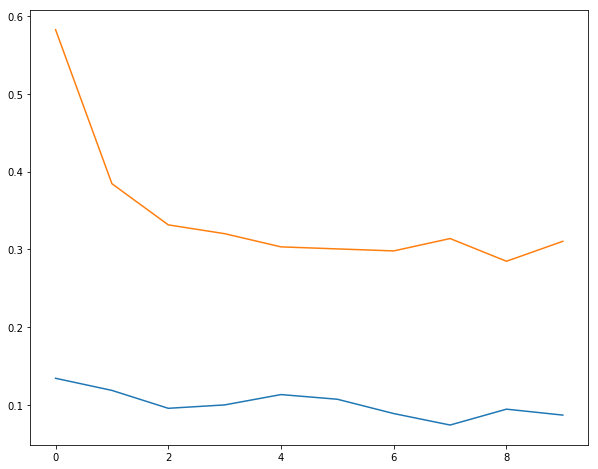

In [26]:
from neuralNetwork2 import *
from weight_init import *

use_gpu = torch.cuda.is_available()
print("use gpu:",use_gpu)
model = neuralNetwork2(33,512,1,0.6)
model.apply(weight_init)
try:
    model.load_state_dict(torch.load('./model/neuralNetwork2.pth'))
except:
    pass
if use_gpu:
    model = model.cuda()

# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 开始训练
losses_train  = []
losses_test = []
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    for i,data in enumerate(train_loader):
        (X_batch, y_batch) = data["traindata"],data['label']
        if use_gpu:
            X_batch =X_batch.cuda()      
            y_batch =y_batch.cuda()
        out = model(X_batch)
        loss = criterion(out, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 100 == 0:
        model.eval()
        with torch.no_grad():
            if use_gpu:
                x_test = x_test.cuda()
                y_test = y_test.cuda()
            predict = model(x_test)
            loss_test = criterion(predict, y_test)
        print(f'step:[{epoch+1}], train loss: {loss.item():.6f}, test loss: {loss_test.item():.6f}')
        losses_train.append(loss.item())
        losses_test.append(loss_test.item())

plt.figure(figsize = (10,8))
plt.plot(losses_train,label = "train loss")
plt.plot(losses_test,label = "teset loss")
plt.show()
torch.save(model.state_dict(), './model/neuralNetwork2.pth')

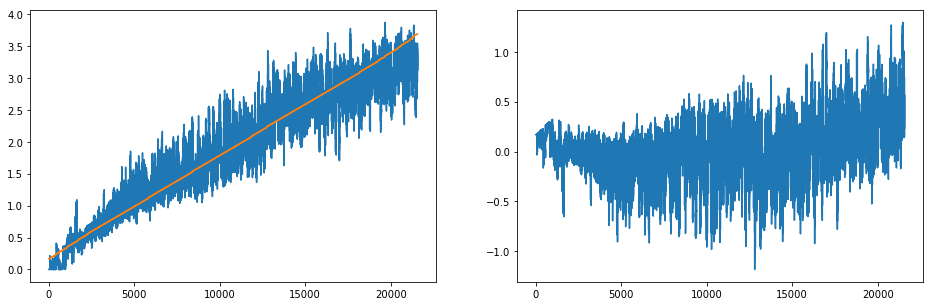

In [27]:
model.eval()
with torch.no_grad():
    x_train = x_train.cuda()
    predict = model(x_train)
predict = predict.cpu()
plt.close("all")
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(predict)
plt.plot(y_train)
plt.subplot(122)
plt.plot((y_train-predict))
# a = train_df["temperature"].values
# plt.plot(a[:350]-0.5)
plt.show()

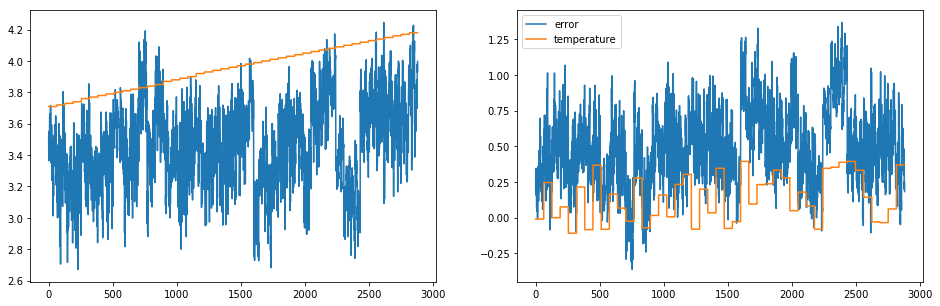

In [28]:
model.eval()
with torch.no_grad():
    x_test = x_test.cuda()
    predict = model(x_test)
predict = predict.cpu()
y_test = y_test.cpu()
x_test = x_test.cpu()
plt.close("all")
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(predict)
plt.plot(y_test)
plt.subplot(122)
plt.plot((y_test-predict),label = "error")
a = train_df["temperature"].values
plt.plot(x_test[:,-1]-0.5,label = "temperature")
plt.legend()
plt.show()